In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import csv


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
model_features_path = '../data/model_features.csv'
transformed_data_men_path = '../data/transformed_data_men_21_to_24.csv'
season_dates_path = '../data/season_dates.csv'


In [79]:

# Load the datasets
model_features = pd.read_csv('../data/model_features.csv')
transformed_data = pd.read_csv('../data/transformed_data_men_21_to_24.csv')

# Drop the 'Unnamed: 0' column if it exists
if 'Unnamed: 0' in model_features.columns:
    model_features.drop('Unnamed: 0', axis=1, inplace=True)

if 'Unnamed: 0' in transformed_data.columns:
    transformed_data.drop('Unnamed: 0', axis=1, inplace=True)

# Identify redundant columns
redundant_columns = set(model_features.columns).intersection(transformed_data.columns)

# Join the dataframes and remove redundant columns
joined_df = pd.concat([transformed_data, model_features.drop(redundant_columns, axis=1)], axis=1)

# Save the joined dataframe to a new CSV file
joined_df.to_csv('../data/joined_dataset.csv', index=False)



In [80]:
# Select numerical columns without missing values
numerical_cols = joined_df.select_dtypes(include=['number']).dropna(axis=1)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# pca_df.head(), pca.explained_variance_ratio_


In [81]:
# We will use the 'pca' object from the previous step to extract the PCA loadings.
# These loadings will map how each original feature contributes to each principal component.

# Since the pca object should already be fitted with our scaled data, we can directly access the components.
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numerical_cols.columns)



In [121]:
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
won,0.001674,-0.174748,0.000293,0.000409,0.021746,-0.188101,0.000351,-0.000158,0.001674,-0.060822,0.030566,-0.000901,0.034432,0.005871,0.112696,-0.118848,0.237927,0.249475,-0.030827,-0.227459,0.058975,0.136152,-0.173011,-0.051693,-0.016776,-0.027447,0.037952,-0.049517,0.010578,-0.031573,0.113349,0.072504,0.015143,-0.051934,-0.037829,0.008191,0.022914,0.215144,-0.070102
team_score,-0.036660,-0.130206,0.085098,0.119776,0.010965,-0.127286,-0.063084,0.024955,-0.095083,-0.030340,-0.004162,-0.197947,0.026627,0.025031,0.070605,-0.047658,0.119352,0.223832,0.072764,-0.107753,0.024494,0.096776,-0.008503,0.156870,-0.004997,-0.045962,-0.011408,-0.008857,-0.199652,-0.354316,-0.123902,0.280667,-0.331183,-0.086473,-0.035067,0.072977,0.012470,0.073192,-0.032224
opponent_score,-0.038981,0.129575,0.084812,0.119121,-0.011144,0.128375,-0.064504,0.024463,-0.094329,0.018510,-0.006048,-0.197815,-0.027321,0.022369,-0.068278,0.058129,-0.090280,-0.180320,0.136245,0.133429,-0.005693,0.054517,0.089845,0.197326,0.018282,0.004350,0.007847,0.001988,-0.167840,-0.380829,-0.166928,0.086664,-0.386981,0.060870,0.019337,0.091045,0.021497,-0.071813,0.020674
season_year,-0.033462,0.000932,0.005511,0.076250,-0.001505,0.002411,0.002116,0.033139,-0.292901,-0.003016,0.001842,0.049179,-0.003928,-0.312295,0.001552,0.089319,0.023563,-0.044836,-0.234483,-0.035392,-0.004655,0.016093,0.039522,-0.028383,-0.353149,-0.270345,0.034036,-0.009734,-0.028338,0.147831,0.111996,-0.052913,-0.031302,0.012167,-0.004396,-0.005835,0.220678,-0.012062,-0.024163
home_game,0.005814,-0.065106,0.000638,0.007100,-0.001864,-0.430505,0.004683,0.007234,-0.012603,0.309612,0.061518,-0.004050,-0.056194,-0.000327,-0.066784,0.025235,-0.046749,-0.145827,0.025114,0.036704,-0.004704,-0.032413,0.040336,0.009763,0.002064,0.016096,0.011377,-0.041474,0.007007,-0.012221,-0.000020,-0.042279,-0.017121,0.017988,-0.015793,-0.004273,0.005568,0.011531,-0.002172


In [116]:
# Function to identify the most influential features for each PCA component
def find_influential_features(pca_loadings, threshold=0.134):
    """
    This function finds the most influential features for each principal component.

    :param pca_loadings: DataFrame containing PCA loadings with features as index and components as columns
    :param threshold: The threshold for considering a feature influential (the average of the absolute values of the loadings across all principal components)
    :return: Dictionary with components as keys and lists of influential features as values
    """
    influential_features = {}
    ct = 0
    for component in pca_loadings.columns:
        # print(pca_loadings[component].abs())
        # Get the absolute values of the loadings for the component
        abs_loadings = pca_loadings[component].abs()
        # Identify features where the absolute loading is above the threshold
        influential = abs_loadings[abs_loadings >= threshold].index.tolist()
        # print(influential)
        ct += 1
        influential_features[component] = influential
    return influential_features

influential_features = find_influential_features(loadings)


In [122]:
# Find the key with the largest list
largest_key = max(influential_features, key=lambda k: len(influential_features[k]))

# Get the largest list
largest_list = influential_features[largest_key]

print(f"The largest list is {largest_list} from key '{largest_key}'")
largest_list

The largest list is ['w', 'l', 'oe', 'te', 'sos', 'srs', 'fg', 'ast', 'tov%', 'ast_per_poss', 'tov_per_poss', 'ast_to_tov', 'game_win_rate', 'w_opp', 'l_opp', 'oe_opp', 'te_opp', 'sos_opp', 'srs_opp', 'fg_opp', 'ast_opp', 'tov%_opp', 'ast_per_poss_opp', 'tov_per_poss_opp', 'ast_to_tov_opp', 'game_win_rate_opp'] from key 'PC1'


['w',
 'l',
 'oe',
 'te',
 'sos',
 'srs',
 'fg',
 'ast',
 'tov%',
 'ast_per_poss',
 'tov_per_poss',
 'ast_to_tov',
 'game_win_rate',
 'w_opp',
 'l_opp',
 'oe_opp',
 'te_opp',
 'sos_opp',
 'srs_opp',
 'fg_opp',
 'ast_opp',
 'tov%_opp',
 'ast_per_poss_opp',
 'tov_per_poss_opp',
 'ast_to_tov_opp',
 'game_win_rate_opp']

In [125]:
file_name = '../data/influential_features.csv'

# Write the list to the CSV file
with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(largest_list)

print(f"List has been written to {file_name}")


List has been written to ../data/influential_features.csv


In [38]:
# Check the shape of pca_df
print(pca_df.shape)

# Check the number of components PCA has retained
print(pca.n_components_)


(38352, 39)
39


In [59]:
# Use the inverse_transform method to reconstruct the data
reconstructed_data = pca.inverse_transform(pca_df)

# The reconstructed_data is in the scaled space, so inverse transform it back to original space
reconstructed_data_original_space = scaler.inverse_transform(reconstructed_data)

# Create a DataFrame for the reconstructed data
reconstructed_df = pd.DataFrame(data=reconstructed_data_original_space, columns=numerical_cols.columns)

# Calculate the Mean Squared Reconstruction Error
reconstruction_error = np.mean((numerical_cols.values - reconstructed_data_original_space) ** 2)


In [61]:
reconstructed_df.shape

(38352, 94)

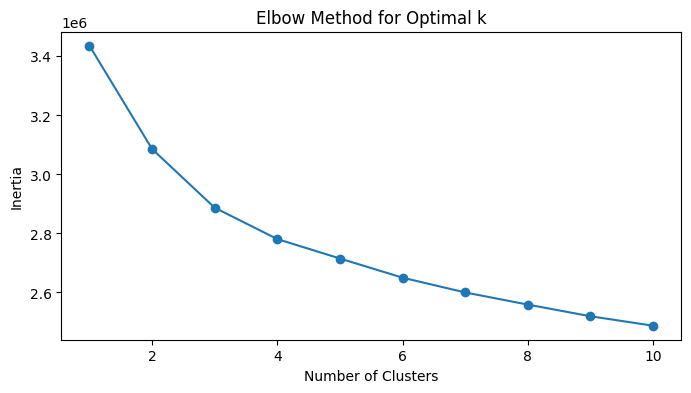

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [44]:
from sklearn.cluster import KMeans

# We have the pca_df from previous steps which is the PCA reduced dataframe.
# Now we will apply K-means clustering to it

# Number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)

# Fitting the input data and getting the cluster labels
pca_df['Cluster'] = kmeans.fit_predict(pca_df.iloc[:, :-1])  # Exclude the last column if it's 'Cluster'


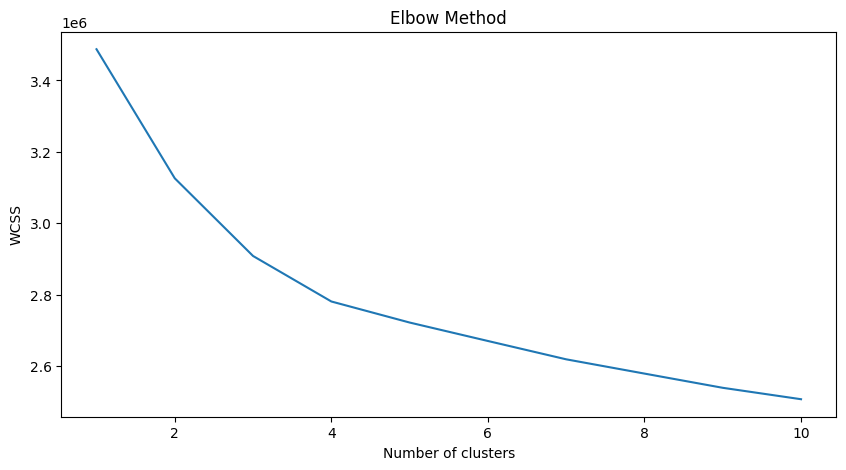

False

In [47]:
# Let's attempt the K-means clustering again, ensuring that the pca_df is loaded and utilized correctly.
# If the dataframe is too large, we may need to consider alternative strategies such as sampling.

# Attempting K-means clustering with a range of clusters to determine the optimal number via the Elbow method.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We will check if the pca_df is present and then proceed with K-means clustering.
try:
    # Check if pca_df is present
    pca_df
except NameError:
    # If pca_df is not defined, we need to indicate that to the user.
    pca_df_not_found = True
else:
    pca_df_not_found = False
    # Perform K-means clustering
    wcss = []  # Within-cluster sum of squares
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(pca_df)
        wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
if not pca_df_not_found:
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  # Within-cluster sum of squares
    plt.show()

pca_df_not_found


In [51]:
# Proceed with K-means clustering using 4 clusters on the PCA-reduced dataset
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(pca_df.iloc[:, :-1])  # Exclude the last column to avoid using cluster labels

# Add the cluster labels to our pca_df
pca_df['Cluster'] = cluster_labels

# Output the first few rows of our dataframe with the new cluster assignments
# pca_df.Cluster.unique()


array([2, 0, 3, 1], dtype=int32)